**Part 1: Data Preparation and Exploration**

**Part 2: Model Building - ARIMA**

**Part 3: Model Building - Exponential Smoothing**

**Part 4: Evaluation and Comparison**

In [1]:
# Time series ARIMA is a powerful time series forecasting technique used when data is nonstatinary
# p = Lags of actual values, d = to remove trends, q = Number of MA(Lags of forecast error)
# AR: AutoRegressive
# I = Integreted
# MA = Moving Average
# ARIMA:(Auto regressive Integrated  Moving Average):Stationary model used for time series forecasting
# ARIMA:(P,Q,D)
# p=order of the AR COMPONENT(NUMBER OF LAGGED OBSERVATIONS)
# d=degree of differencing needed to make time series stationary
#q:Order of MA(number of lagged forecast errors used in the model)
import pandas as pd
import numpy as np
#ARIMA:AUTOREGRESSIVE INTEGRATED MOVING AVERAGE
# STATISTICAL MODEL:Time series
# ARIMA MODEL(P,D,Q):THESES ARE ASSIGNED TO MODIFY THE MODEL
#P=AUTO REGRESSIVE
#use case:we are using exchange rate, we are anlayzing it using arima

In [2]:
import pandas as pd
df=pd.read_csv("exchange_rate.csv",index_col='date',parse_dates=True)
# standard format(data-month-year)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [3]:
df.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [4]:
df.shape

(7588, 1)

In [5]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

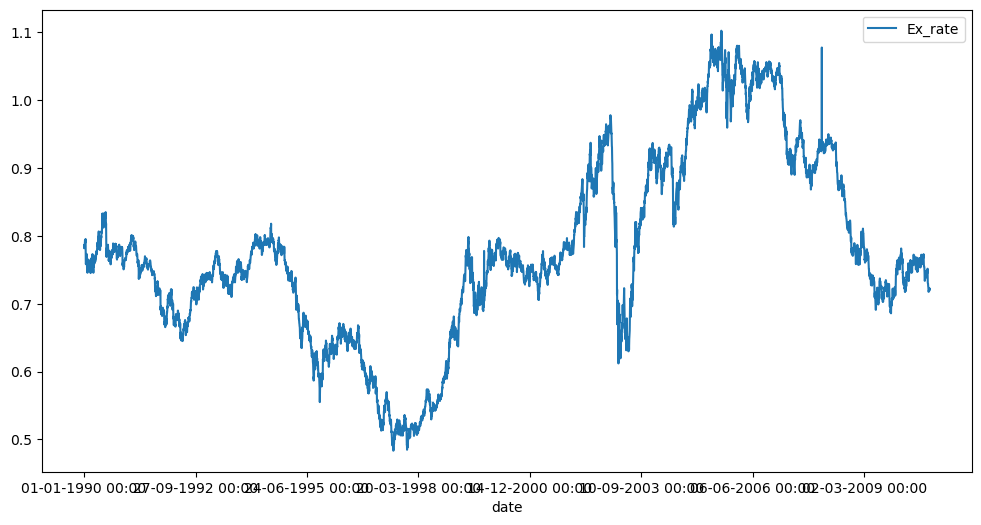

In [6]:
df.plot(figsize=(12,6))

In [7]:
#

In [8]:
# AUGMENT DICKEY=FULLER TEST:Time series stationary/Nonstationary
# Hypothesis Testing Arima
# TSA: time series alalysis referce to the techniques use to analyse forcast time based data
# AIC: Acite information criteare. it is a metric use to evaluate the data without overfitting
# Lower aic : Better model
#Akaike Information CRITERION(AIC)
# An augmented Dickery
#aic(akaike Information criteria)
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    
  dftest=adfuller(df['Ex_rate'],autolag='AIC')

  print("1. ADF :",dftest[0])
  print("2. P-value:",dftest[1])
  print("3. Num of Lags",dftest[2])
  print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
  print("5. Critical values:",dftest[4])
  for key, val in dftest[4].items():
      print("\t",key,":",val)

In [9]:
ad_test(df['Ex_rate'])

1. ADF : -1.6649941807381343
2. P-value: 0.44923273535979974
3. Num of Lags 1
4. Num of Observation used for ADF Regression and Critical Values Calculation: 7586
5. Critical values: {'1%': -3.4312123140180137, '5%': -2.861921078147796, '10%': -2.5669728434336108}
	 1% : -3.4312123140180137
	 5% : -2.861921078147796
	 10% : -2.5669728434336108


In [10]:
# if required install 
#!pip install pmdarima

In [11]:
# pmdarima is python library that automates the process of building a arima model
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit=auto_arima(df['Ex_rate'],trace=True,suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=3.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=2.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=1.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=4.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=2.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=5.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=2.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=1.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.316, Time=3.75 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 30.893 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:               SARIMAX(1, 1, 0)   Log Likelihood               28054.159
Date:                Sun, 03 Aug 2025   AIC                         -56104.319
Time:                        12:25:11   BIC                         -56090.450
Sample:                             0   HQIC                        -56099.559
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -64.439      0.000      -0.135      -0.127
sigma2      3.595e-05   9.94e-08    361.720      0.000    3.58e-05    3.61e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865011.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
df.shape

(7588, 1)

In [15]:
# last 30 rows is removed from training and it is moved to testing
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(7558, 1) (30, 1)


In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model=ARIMA(train['Ex_rate'],order=(1,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7558
Model:                 ARIMA(1, 1, 0)   Log Likelihood               27934.469
Date:                Sun, 03 Aug 2025   AIC                         -55864.938
Time:                        12:25:12   BIC                         -55851.078
Sample:                             0   HQIC                        -55860.180
                               - 7558                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1317      0.002    -64.444      0.000      -0.136      -0.128
sigma2      3.604e-05   9.99e-08    360.870      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2846350.67
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.98   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

7558    0.744095
7559    0.744155
7560    0.744147
7561    0.744148
7562    0.744148
7563    0.744148
7564    0.744148
7565    0.744148
7566    0.744148
7567    0.744148
7568    0.744148
7569    0.744148
7570    0.744148
7571    0.744148
7572    0.744148
7573    0.744148
7574    0.744148
7575    0.744148
7576    0.744148
7577    0.744148
7578    0.744148
7579    0.744148
7580    0.744148
7581    0.744148
7582    0.744148
7583    0.744148
7584    0.744148
7585    0.744148
7586    0.744148
7587    0.744148
Name: predicted_mean, dtype: float64
date
11-09-2010 00:00    0.744095
12-09-2010 00:00    0.744155
13-09-2010 00:00    0.744147
14-09-2010 00:00    0.744148
15-09-2010 00:00    0.744148
16-09-2010 00:00    0.744148
17-09-2010 00:00    0.744148
18-09-2010 00:00    0.744148
19-09-2010 00:00    0.744148
20-09-2010 00:00    0.744148
21-09-2010 00:00    0.744148
22-09-2010 00:00    0.744148
23-09-2010 00:00    0.744148
24-09-2010 00:00    0.744148
25-09-2010 00:00    0.744148
26-09-2010 00

<Axes: xlabel='date'>

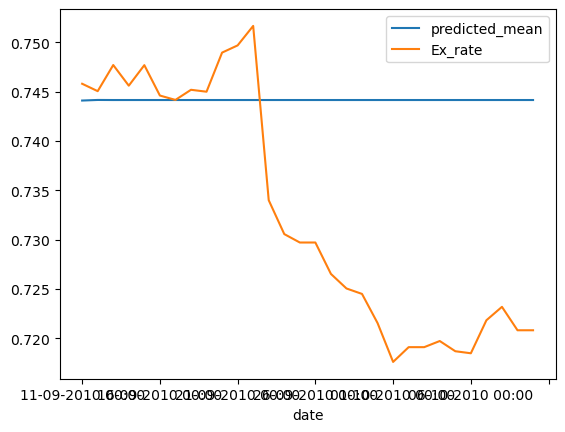

In [19]:
pred.plot(legend=True)
test['Ex_rate'].plot(legend=True)

In [20]:
test['Ex_rate'].mean()

0.732738

In [21]:


from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Ex_rate']))
print(rmse)

0.016634697604867923


In [22]:
model2=ARIMA(df['Ex_rate'],order=(0,0,0))
model2=model2.fit()
df.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [23]:
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels')
pred = pred.rename('ARIMA Predictions')
print(pred)

7588    0.776969
7589    0.776969
7590    0.776969
7591    0.776969
7592    0.776969
7593    0.776969
7594    0.776969
7595    0.776969
7596    0.776969
7597    0.776969
7598    0.776969
7599    0.776969
7600    0.776969
7601    0.776969
7602    0.776969
7603    0.776969
7604    0.776969
7605    0.776969
7606    0.776969
7607    0.776969
7608    0.776969
7609    0.776969
7610    0.776969
7611    0.776969
7612    0.776969
7613    0.776969
7614    0.776969
7615    0.776969
7616    0.776969
7617    0.776969
7618    0.776969
Name: ARIMA Predictions, dtype: float64


<Axes: >

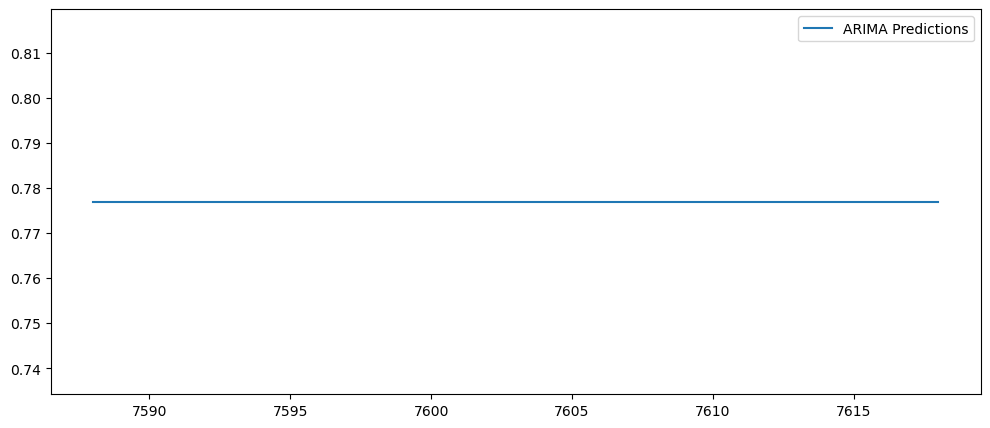

In [24]:
pred.plot(figsize=(12,5),legend=True)